# The Perceptron Algorithm

A Perceptron is a system that learns using labeled examples of feature vectors, mapping these inputs to their corresponding output class labels. In its simplest form, a Perceptron contains N input nodes, one for each entry in the input row, followed by only one layer in the network with just a single node in that layer.

Training a Perceptron is a fairly straightforward operation. Our goal is to obtain a set of weights *w* that accurately classifies each instance in our training set. In order to train our Perceptron, we iteratively feed the network our training data multiple times. Each time the network has seen the full set of training data, we say an epoch has passed. It normally takes many epochs until a weight vector _w_ can be learned to linearly separate our two classes of data.

![Perceptron](https://drive.google.com/uc?id=1K7olbB11mSfAwPmB8BeeRNe6XbuGSK4D)

The pseudocode is the following:
1. Initialize our weight vector w with small random values
2. Until Perceptron converges
    1. Loop over each input and class label
    2. Take $x$ and pass it through the network, calculating the output value: $y = (w · x)$
    3. Update the weights: if ŷ = 0 --> $w_i = w_i + \alpha x_i$, if ŷ = 1 --> $w_i = w_i - \alpha x_i$
        

# Script
## Daniel Roa - A01021960
## Delivery date: 08/07/2021

In [1]:
import random, math
import matplotlib.pyplot as plt

In [2]:
class Perceptron:        
    """Perceptron class

        Args:
            M: Number of inputs
            alpha: Learning rate
        
        Attributes:
            W: The weights for the perceptron
            b: bias
            alpha: The learning rate
    """
    def __init__(self, N, M, alpha=0.5):   
        # N: number of weights     
        # Creates an array of N weights and initializes with random values
        self.alpha = alpha
        self.b = random.uniform(0, 1)
        self.M = M
        self.posX = []
        self.W = [random.uniform(0, 1), random.uniform(0, 1)]
        self.error = []
            
    def sigmoid(self, x):
      #pass
      return (1/(1 + math.exp(-x)))

    def loss(self, yHat, y):
      '''
        Function in charge of calculating the Loss function (L).

        Args:
          yHat: equals to y with a hat on a regular equation, it's the predictions' values.
          y: 
      '''
      return (-(y * math.log(yHat) + (1 - y) * math.log(1 - yHat)))

    def plot(self, errors, xValues):
      '''
        Function in charge of plotting the graph using the values from the errors and the epochs.

        Args:
          errors: equals to the values obtained from the Loss function
          xValues: equals to the epoch in which the perceptronStep() function was called upon.
      '''
      plt.plot(xValues, errors)
      plt.xlabel('Epochs')
      plt.ylabel('Error % over time')
      plt.show()
      return

    def predict(self, x):
        """
            Makes a prediction for the specified input
            
            Args:
                x: Input to make a prediction on.
        """
        return self.sigmoid((x[0] * self.W[0]) + (x[1] * self.W[1]) + self.b)
    
    def perceptronStep(self, X, y):
        """
            The perceptron basic step. It updates the weights based on the input data.
            
            Args:
                X: Array with the input data
                y: Data labels
        """
        # Variables that will hold different information
        J = 0
        L = 0
        db = 0
        dw1 = 0
        dw2 = 0

        for i in range(self.M):
          # Prediction
          yHat = self.sigmoid((X[i][0] * self.W[0]) + (X[i][1] * self.W[1]) + self.b)
          # Error 
          J += self.loss(yHat, y[i][0])

          # Gradient Descent calculations start here
          dy = yHat - y[i][0]
          dw1 += X[i][0] * dy
          dw2 += X[i][1] * dy
          db += dy

        # Training 
        dw1 /= self.M
        dw2 /= self.M
        db /= self.M

        # End of Gradient Descent calculations

        self.W[0] -= dw1 * self.alpha
        self.W[1] -= dw2 * self.alpha
        self.b -= db * self.alpha

        # print('Error ', J)
        self.error.append(J)

        #print(self.error)

        return
        #pass
    
    def train(self, X, y, epochs = 1000):
        """
            Runs the perceptron step a specified number of epochs
            
            Args:
                X: input data
                y: labels
                epochs: The number of times the step is executed
        """
        # loop over the desired epochs
        for epoch in range(epochs):
            self.posX.append(epoch)
            self.perceptronStep(X, y)
        self.plot(self.error, self.posX)
        return
                

## Execution of the AND data

Initial weights [0.025010755222666936, 0.27502931836911926]


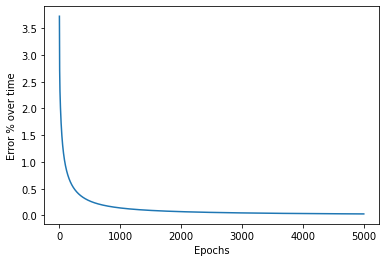

Weights after training [9.272023446198109, 9.272023447395046]
Prediction for [0, 0] is 7.691542740736337e-07
Prediction for [0, 1] is 0.008114540548667707
Prediction for [1, 0] is 0.00811454053903392
Prediction for [1, 1] is 0.9886382202467616


In [3]:
# change the seed to see different solutions
random.seed(42)

# The following data is used to train the perceptron for the AND operation
# Test your code with the OR operation
X = [[0,0],[0,1], [1,0], [1,1]]
# AND data
y = [[0],[0], [0], [1]]

m = len(y) 

p = Perceptron(4, m)
print(f"Initial weights {p.W}")

# Test training with different epochs
p.train(X, y, 5000)
print(f"Weights after training {p.W}")

# Test your model with a prediction
print(f'Prediction for {X[0]} is {p.predict(X[0])}')
print(f'Prediction for {X[1]} is {p.predict(X[1])}')
print(f'Prediction for {X[2]} is {p.predict(X[2])}')
print(f'Prediction for {X[3]} is {p.predict(X[3])}')


## Execution of the OR data

Initial weights [0.025010755222666936, 0.27502931836911926]


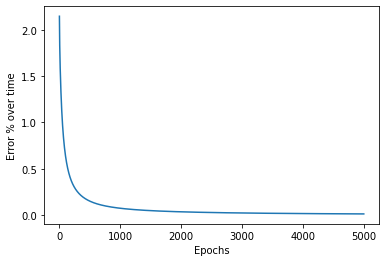

Weights after training [10.529642796968172, 10.529670127973581]
Prediction for [0, 0] is 0.008130687116729329
Prediction for [0, 1] is 0.9967496087065196
Prediction for [1, 0] is 0.9967495201576086
Prediction for [1, 1] is 0.9999999128266428


In [4]:
# change the seed to see different solutions
random.seed(42)

# The following data is used to train the perceptron for the AND operation
# Test your code with the OR operation
X = [[0,0],[0,1], [1,0], [1,1]]
# OR data
y = [[0],[1], [1], [1]]

m = len(y) 

p = Perceptron(4, m)
print(f"Initial weights {p.W}")

# Test training with different epochs
p.train(X, y, 5000)
print(f"Weights after training {p.W}")

# Test your model with a prediction
print(f'Prediction for {X[0]} is {p.predict(X[0])}')
print(f'Prediction for {X[1]} is {p.predict(X[1])}')
print(f'Prediction for {X[2]} is {p.predict(X[2])}')
print(f'Prediction for {X[3]} is {p.predict(X[3])}')
